In [1]:
!pip install pandas scikit-learn numpy

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv('large_data.csv')

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [7]:
y_pred = nb.predict(X_test)


In [8]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[398  12  26]
 [  0 431   0]
 [ 31   3 331]]

Classification Report:
              precision    recall  f1-score   support

       COVID       0.93      0.91      0.92       436
   INFLUENZA       0.97      1.00      0.98       431
 VIRUS FEVER       0.93      0.91      0.92       365

    accuracy                           0.94      1232
   macro avg       0.94      0.94      0.94      1232
weighted avg       0.94      0.94      0.94      1232



In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.9415584415584416


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [13]:
symptoms_encoder = OneHotEncoder(handle_unknown='ignore')
symptoms_encoder.fit(X_train)
X_train_encoded = symptoms_encoder.transform(X_train)
X_test_encoded = symptoms_encoder.transform(X_test)

In [14]:
import numpy as np

In [15]:
cv_scores = cross_val_score(nb, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.96347403 0.95941558 0.95941558 0.95211039 0.80178716]
Mean cross-validation score: 0.9272405498644328


In [16]:
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

In [18]:
cm = confusion_matrix(y_test, y_pred)

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [20]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))
    plt.tight_layout()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(len(np.unique(y_test))):
        for j in range(len(np.unique(y_test))):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.show()

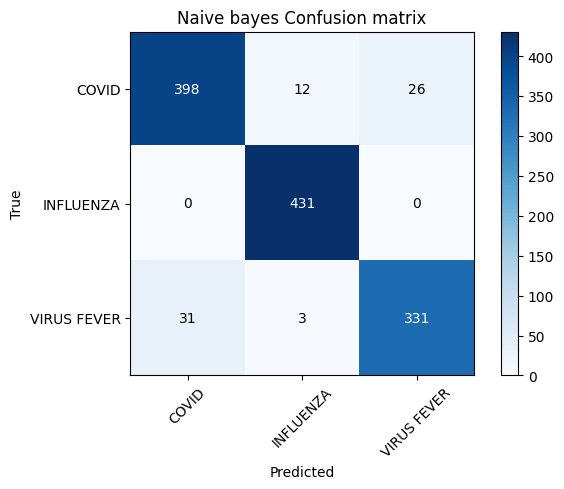

In [21]:
plot_confusion_matrix(nb, X_test, y_test, 'Naive bayes')